### Задание
1.  Реализовать классический и скорректированный коэффициенты детерминации для выбора модели.
2. Реализовать процедуру выбора модели с использование различных версий критерия Акаике и байесовского информационных критериев.
3. Продемонстрировать примеры оценивания моделей с использованием метрик accuracy, точность, полнота, F-мера в задачах классификации.
4. Продемонстрировать примеры различных соотношений для AUC-ROC (см. пример в лекции).
5. Реализовать логистическую регрессию для задачи классификации.
6. Продемонстрировать примеры оценивания моделей с использованием метрик MSE (RMSE), MAE, MAPE, SMAPE и WAPE в задачах регрессии.
7. С использованием метрик, оценить качество заполнения пропусков в пользовательских данных.

### Данные
**Ссылка** - https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data

**Описание**:

Онлайновые каналы бронирования гостиниц кардинально изменили возможности бронирования и поведение клиентов. Значительное число бронирований гостиниц отменяется по причине отмены или незаезда. Типичными причинами отмены бронирования являются изменение планов, конфликты в расписании и т.д. Часто это облегчается возможностью сделать это бесплатно или, предпочтительно, по низкой цене, что выгодно гостям отеля, но является менее желательным и, возможно, снижающим доходы фактором, с которым приходится иметь дело гостиницам.

**Цель**:

**Основная задача** - прогнозирование отмены бронирования в гостинице для снижения потерь доходов из-за незанятых номеров.


## Импорты, загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Hotel Reservations.csv")

In [5]:
df.head(10) 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


## Предобработка

In [6]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#OHE
categorical_vars = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
df_encoded = pd.get_dummies(df, columns=categorical_vars)
label_encoder = LabelEncoder()
df_encoded['booking_status'] = label_encoder.fit_transform(df_encoded['booking_status'])

In [11]:
# Разделим на таргет и основные данные
X = df_encoded.drop(['Booking_ID', 'booking_status'], axis=1)
y = df_encoded['booking_status']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

X_train_fe['total_nights'] = X_train_fe['no_of_weekend_nights'] + X_train_fe['no_of_week_nights']
X_train_fe['total_people'] = X_train_fe['no_of_adults'] + X_train_fe['no_of_children']

X_test_fe['total_nights'] = X_test_fe['no_of_weekend_nights'] + X_test_fe['no_of_week_nights']
X_test_fe['total_people'] = X_test_fe['no_of_adults'] + X_test_fe['no_of_children']

# №3. Метрики классификации

### Построение модели

#### RandomForest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

#### Показатели на тренировочных данных

In [21]:
rf_train_accuracy = accuracy_score(y_train, rf.predict(X_train))
rf_train_recall = recall_score(y_train, rf.predict(X_train))
rf_train_precision = precision_score(y_train, rf.predict(X_train))
rf_train_f1_score = f1_score(y_train, rf.predict(X_train))
print(f"accuracy: {rf_train_accuracy:.4f}")
print(f"precision: {rf_train_recall:.4f}")
print(f"recall: {rf_train_precision:.4f}")
print(f"f1: {rf_train_f1_score:.4f}")

accuracy: 0.9940
precision: 0.9971
recall: 0.9940
f1: 0.9956


In [22]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9469
           1       0.99      1.00      1.00     19551

    accuracy                           0.99     29020
   macro avg       0.99      0.99      0.99     29020
weighted avg       0.99      0.99      0.99     29020



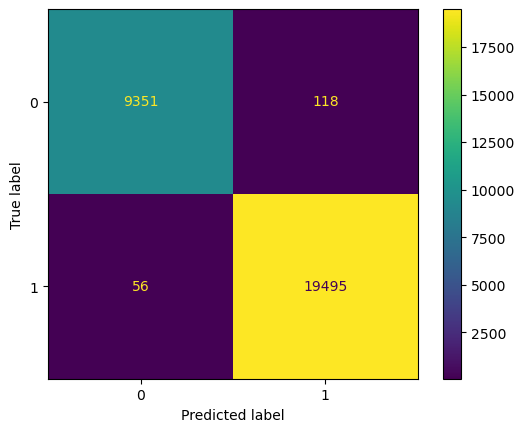

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train,  rf.predict(X_train))
model_display = ConfusionMatrixDisplay(cm).plot()

#### Проверка на тестовых данных

In [37]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.91      0.90      7255



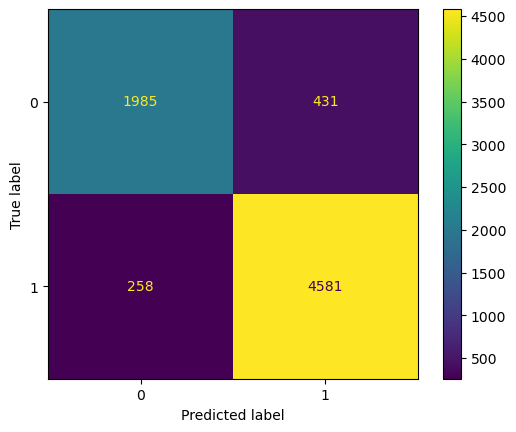

In [38]:
cm = confusion_matrix(y_test,  rf_pred)
model_display = ConfusionMatrixDisplay(cm).plot()

#### Оценка по ROC-AUC

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay,roc_curve
from sklearn import metrics

In [28]:
roc_score_rf = roc_auc_score(y_test, rf_pred)
roc_score_rf

0.8841445796364801

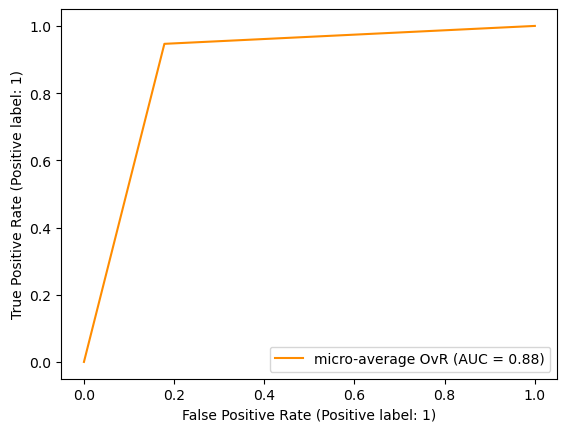

In [31]:
rc = roc_curve(y_test, rf_pred)
RocCurveDisplay.from_predictions(
    y_test,
    rf_pred,
    name="micro-average OvR",
    color="darkorange")

#  №5. Логистическая регрессия

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
print(f"Logistic regression model accuracy: {logreg_train_accuracy:.4f}")


Logistic regression model accuracy: 0.8021


#### Метрики на тренировочных данных

In [35]:
lr_train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
lr_train_recall = recall_score(y_train, logreg.predict(X_train))
lr_train_precision = precision_score(y_train, logreg.predict(X_train))
lr_train_f1_score = f1_score(y_train, logreg.predict(X_train))
print(f"accuracy: {rf_train_accuracy:.4f}")
print(f"precision: {rf_train_recall:.4f}")
print(f"recall: {rf_train_precision:.4f}")
print(f"f1: {rf_train_f1_score:.4f}")

accuracy: 0.9940
precision: 0.9971
recall: 0.9940
f1: 0.9956


#### На тестовых

In [39]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.68      2416
           1       0.82      0.89      0.86      4839

    accuracy                           0.80      7255
   macro avg       0.78      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255



In [41]:
roc_score_lr = roc_auc_score(y_test, logreg_pred)
roc_score_lr

0.7559749684886456

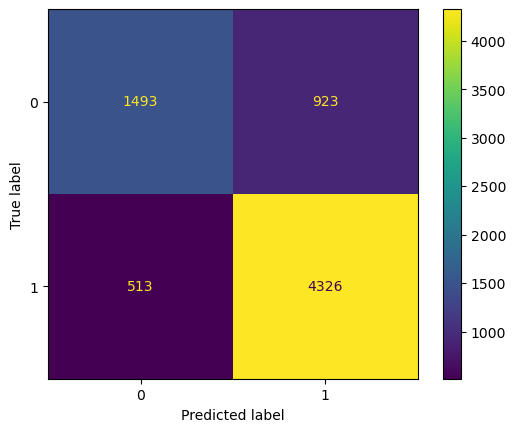

In [42]:
cm = confusion_matrix(y_test,  logreg_pred)
model_display = ConfusionMatrixDisplay(cm).plot()

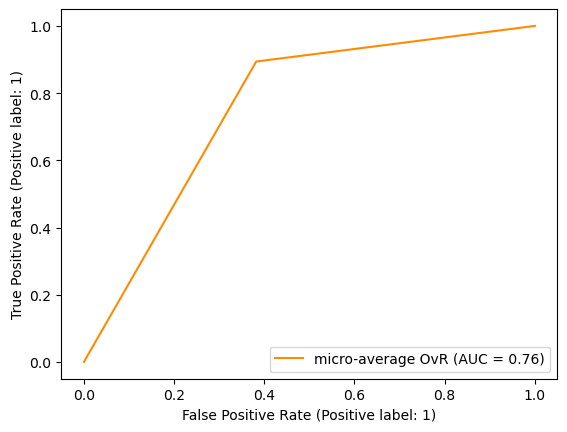

In [44]:
rc = roc_curve(y_test, logreg_pred)
RocCurveDisplay.from_predictions(
    y_test,
    logreg_pred,
    name="micro-average OvR",
    color="darkorange")

# №7 - С использованием метрик, оценить качество заполнения пропусков в пользовательских данных.

### Перефразируем задачу в целях поиска пропущенных значений. Эти пропущенные значения добавим, чтобы потом заполнить и позже оценить заполнение пропусков.

In [45]:
df_new = pd.concat([X,y], axis = 1)

In [50]:
df_new.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0


### Допустим добавим пропуски к avg_price_per_room и будем пробовать их заполнять в рамках задачи регрессии

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

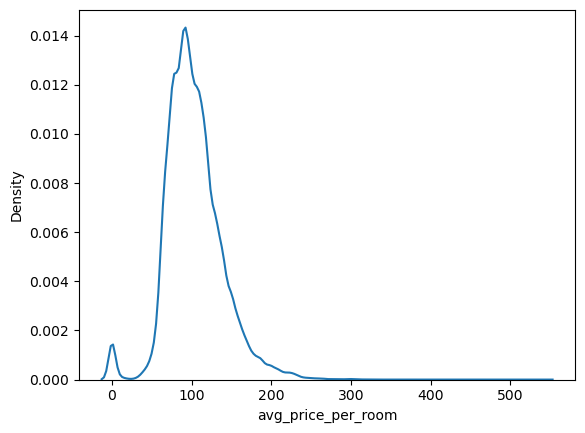

In [51]:
sns.kdeplot(df_new['avg_price_per_room'])

In [74]:
dist = np.arange(80, 90)

In [75]:
len(df_new.loc[df_new['avg_price_per_room'].isin(dist) , 'avg_price_per_room'])

2141

In [76]:
df_full = df_new.copy()

In [77]:
df_new.loc[df_new['avg_price_per_room'].isin(dist) , 'avg_price_per_room'] = np.nan

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

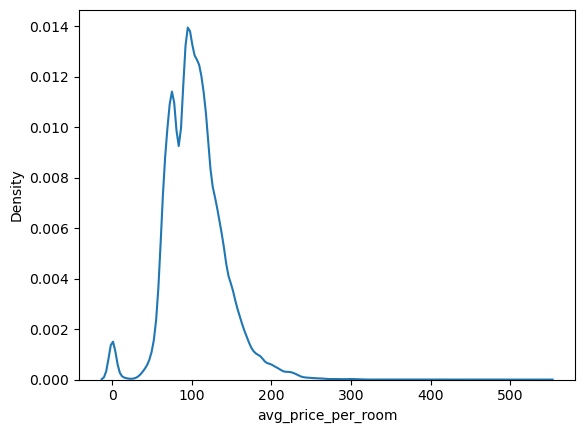

In [78]:
sns.kdeplot(df_new['avg_price_per_room'])

## №1. Классический и скорректированный коэффициенты детерминации для выбора модели

In [79]:
Xnew = df_new.drop('avg_price_per_room', axis = 1)
ynew = df['avg_price_per_room']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.25, random_state=42)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [103]:
from sklearn.metrics import r2_score

models = [LinearRegression(),
          KNeighborsRegressor(n_neighbors=6), 
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),
          SVR(),
          LGBMRegressor()
         ]

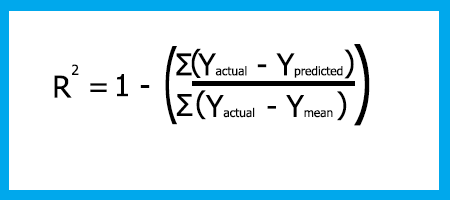

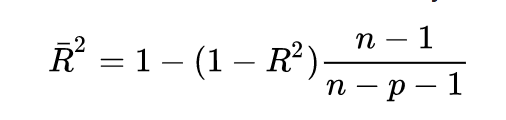

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

names = []
r2_scores = []
r2_corrected_scores = []
for model in models:
    m = str(model)
    name = m[:m.index('(')]
    names.insert(0, name)
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    r2_scores.insert(0, r2)
    r2_corrected_scores.insert(0, 1 - (1-r2) * (len(y_test)-1) /(len(y_test)-X_train.shape[1]-1))
testModels = pd.DataFrame({'Model':names, 'R2':r2_scores, 'R2_Adjusted':r2_corrected_scores})
testModels.set_index('Model', inplace=True)
testModels

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 27206, number of used features: 28
[LightGBM] [Info] Start training from score 103.498378


,R2,R2_Adjusted
Model,,
LGBMRegressor,0.767092,0.766319
SVR,0.557812,0.556344
RandomForestRegressor,0.800688,0.800027
KNeighborsRegressor,0.667971,0.666869
LinearRegression,0.506026,0.504386


<Axes: title={'center': 'R2_Adjusted'}, xlabel='Model'>

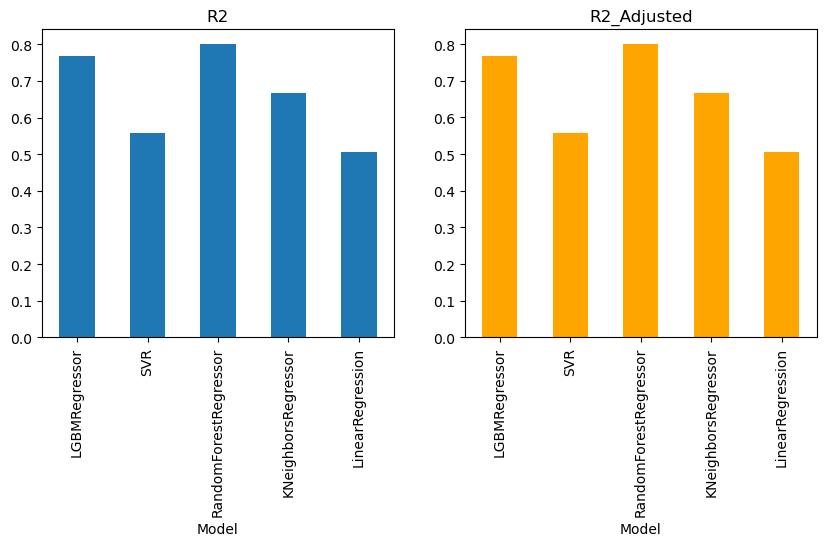

In [105]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
testModels.R2.plot(ax=axes[0], kind='bar', title='R2')
testModels.R2_Adjusted.plot(ax=axes[1], kind='bar', title='R2_Adjusted', color='orange')

## №2. Выбор модели с помощью BIC и AIC

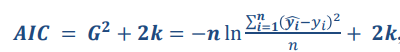
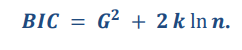

In [106]:
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

In [107]:
models = [LinearRegression(),
          KNeighborsRegressor(n_neighbors=6), 
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),
          SVR(),
          LGBMRegressor()
         ]

In [111]:
names = []
aics = []
bics = []
for model in models:
    m = str(model)
    name = m[:m.index('(')]
    names.insert(0, name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_aic = len(y_train) * np.log(np.sum(np.power(y_pred - y_test, 2)) / len(y_train)) + 2 * (X_test.shape[1]+ 1)

    aics.insert(0, model_aic/1000)
    model_bic =  len(y_train) * np.log(np.sum(np.power(y_pred - y_test, 2)) /
                                            len(y_train)) + 2 * (X_test.shape[1] + 1) * np.log(len(y_train))
    bics.insert(0, model_bic/1000)
testModels = pd.DataFrame({'Model': names, 'Aic': aics, 'Bic':bics})
testModels.set_index('Model', inplace=True)
testModels

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 27206, number of used features: 28
[LightGBM] [Info] Start training from score 103.498378


,Aic,Bic
Model,,
LGBMRegressor,124.069037,124.640131
SVR,141.510533,142.081627
RandomForestRegressor,119.854751,120.425845
KNeighborsRegressor,133.715665,134.286759
LinearRegression,144.523561,145.094655


<Axes: title={'center': 'Bic'}, xlabel='Model'>

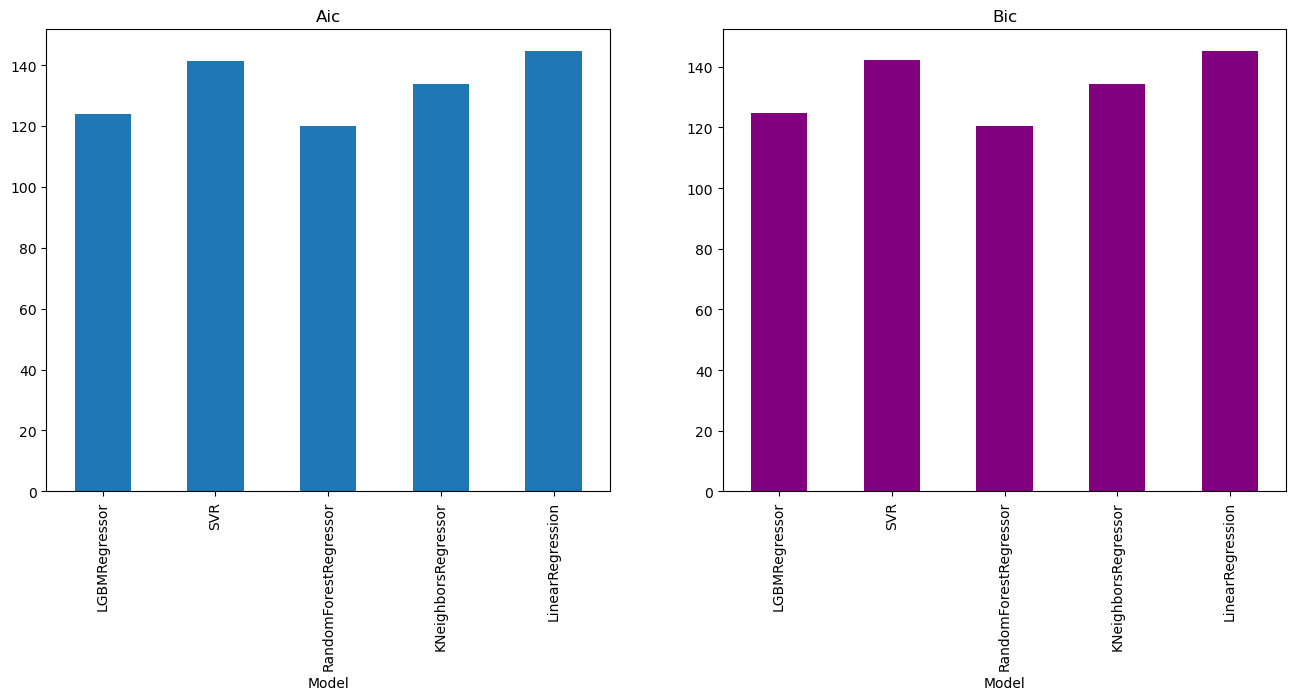

In [112]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
testModels.Aic.plot(ax=axes[0], kind='bar', title='Aic')
testModels.Bic.plot(ax=axes[1], kind='bar', title='Bic', color = 'purple')

## №6. Метрики MSE (RMSE), MAE, MAPE, SMAPE и WAPE в задачах регрессии

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
import plotly.graph_objects as go

In [127]:
# создаем временные структуры
mse_models = []
mae_models = []
mape_models = []
smape_models = []
wape_models = []
names = []
# для каждой модели из списка
for model in models:
    m = str(model)
    name = m[:m.index('(')]
    names.insert(0, name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    smape = 1 / (len(y_train)) * np.sum(2 * np.abs(y_pred - y_test) / ((y_test) + (y_pred)))
    wape = np.sum(np.abs(y_test - y_pred) / y_test) / np.sum(y_test) * 100
    mse_models.insert(0, mse)
    mae_models.insert(0, mae)
    mape_models.insert(0, mape)
    smape_models.insert(0, smape)
    wape_models.insert(0, wape)
testModels = pd.DataFrame({'Model': names, 'MSE': mse_models, 'MAE': mae_models, 'MAPE': mape_models,
                           'SMAPE': smape_models, 'WAPE': wape_models})
testModels.set_index('Model', inplace=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 27206, number of used features: 28
[LightGBM] [Info] Start training from score 103.498378


In [128]:
mae_models

[10.837786171894134,
 15.28621807094902,
 8.34718767985952,
 12.237853126033741,
 17.944388037308517]

In [129]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=names, y=mse_models,
 mode='lines+markers',
 name='MSE'))
fig.add_trace(go.Scatter(x=names, y=mae_models,
 mode='lines+markers',
 name='MAE'))
fig.update_layout(title='Метрик для различных моделей регрессии',
     xaxis_title='Модель',
     yaxis_title='Метрика')
fig

In [130]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=names, y=mape_models,
 mode='lines+markers',
 name='MAPE'))
fig.add_trace(go.Scatter(x=names, y=smape_models,
 mode='lines+markers',
 name='SMAPE'))
fig.add_trace(go.Scatter(x=names, y=wape_models,
 mode='lines+markers',
 name='WAPE'))
fig.update_layout(title='Метрик для различных моделей регрессии',
     xaxis_title='Модель',
     yaxis_title='Метрика')
fig

In [131]:
testModels

,MSE,MAE,MAPE,SMAPE,WAPE
Model,,,,,
LGBMRegressor,286.188968,10.837786,1.821214e+15,0.039609,inf
SVR,543.343859,15.286218,3.929432e+15,0.055924,inf
RandomForestRegressor,243.451111,8.347188,1.680912e+15,0.034403,inf
KNeighborsRegressor,407.984646,12.237853,1.806681e+15,0.042933,inf
LinearRegression,606.977077,17.944388,3.250112e+15,0.058852,inf


# №4 Продемонстрировать примеры различных соотношений для AUC-ROC

[0 1 0 1 1 0 1 0 0 0]


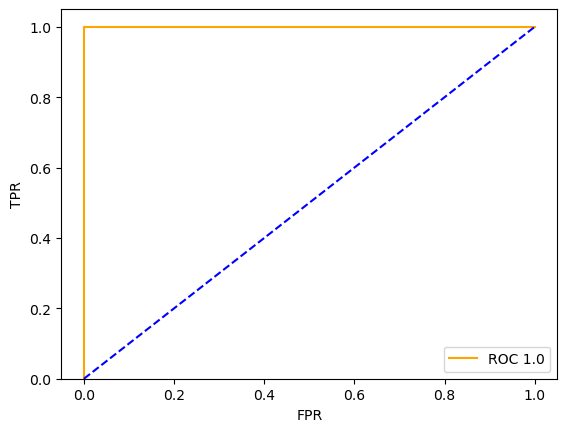

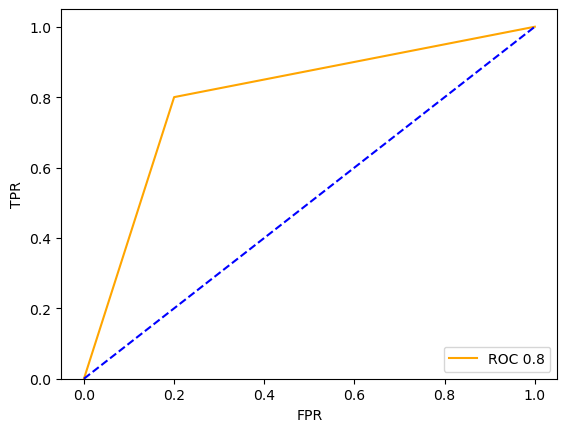

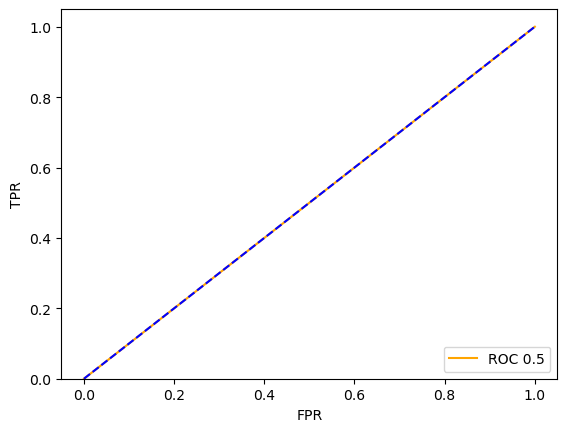

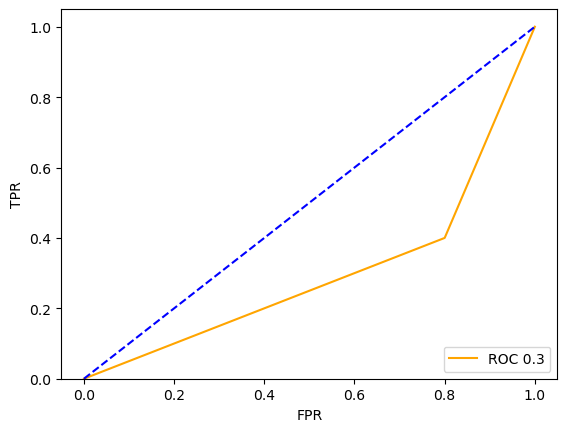

In [132]:
from sklearn.metrics import roc_auc_score, auc, roc_curve

y_valid_roc = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0,])  # Истинные метки классов
y_pred_100 = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])  # Предсказанные оценки модели
y_pred_80 = np.array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1])  # Истинные метки классов
y_pred_50 = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0])
y_pred_30 = np.array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1])# Предсказанные оценки модели

y_true_0_5 = np.random.choice([0, 1], size=100, p=[0.5, 0.5])
print(y_pred_50)
y_pred = np.array([y_pred_100, y_pred_80, y_pred_50, y_pred_30])
for mas in y_pred:
    fpr, tpr, treshold = roc_curve(y_valid_roc, mas)
    roc_auc = auc(fpr, tpr)
    # строим график
    plt.plot(fpr, tpr, color='orange', label='ROC ' + str(roc_auc))
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.ylim([0, 1.05])
    plt.legend(loc="lower right")
    plt.xlabel('FPR')
    plt.ylabel('TPR')  
    plt.show() 

# №7 Оценим заполнение пропусков

In [133]:
df_without_nan =  df_new.dropna(subset=['avg_price_per_room'])
Xnew_n = df_without_nan.drop('avg_price_per_room', axis = 1)
ynew_n = df_without_nan['avg_price_per_room']

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

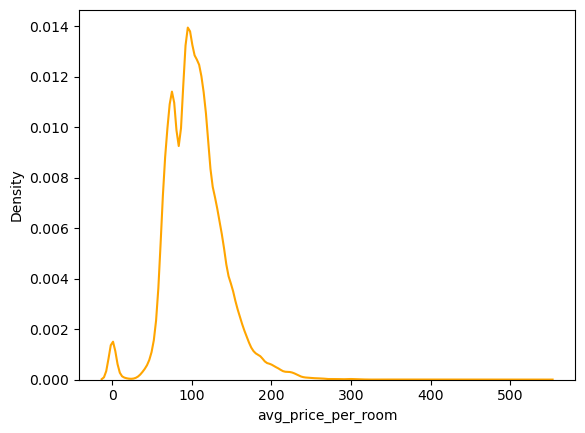

In [138]:
sns.kdeplot(df_new['avg_price_per_room'], color = 'orange')

In [139]:
df_new['avg_price_per_room'].isnull().sum()

2141

### Замена средним

In [144]:
X_test_NA = df_full.drop('avg_price_per_room', axis = 1)
y_test_NA = df['avg_price_per_room']

In [145]:
df_new = df_new.fillna(df_new['avg_price_per_room'].mean())
print("R^2 =", r2_score(y_test_NA, df_new['avg_price_per_room']))

R^2 = 0.9803381132331067


### KNN

In [146]:
from sklearn.impute import KNNImputer
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xnew_n, ynew_n)
y_pred = knn.predict(X_test_NA)
print("R^2 =", r2_score(y_test_NA, y_pred))

R^2 = 0.661070514928846


### Линейная регрессия

In [147]:
model = LinearRegression()
model.fit(Xnew_n, ynew_n)
y_pred = model.predict(X_test_NA)
print("R^2 =", r2_score(y_test_NA, y_pred))

R^2 = 0.5206957004617014


### LGBM

In [148]:
model = LGBMRegressor()
model.fit(Xnew_n, ynew_n)
y_pred = model.predict(X_test_NA)
print("R^2 =", r2_score(y_test_NA, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 34134, number of used features: 28
[LightGBM] [Info] Start training from score 104.602446
R^2 = 0.8067546101375178


## RandomForest

In [149]:
model = RandomForestRegressor()
model.fit(Xnew_n, ynew_n)
y_pred = model.predict(X_test_NA)
print("R^2 =", r2_score(y_test_NA, y_pred))

R^2 = 0.9625653796131871


### Замена медианой

In [150]:
df_new = df_new.fillna(df_new['avg_price_per_room'].median())
print("R^2 =", r2_score(y_test_NA, df_new['avg_price_per_room']))

R^2 = 0.9803381132331067
